# Lista 6 - Dataset de renda de americanos dos Estados Unidos

## Importando libs

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
from my_libs.transform import Normalize, Standardize
from my_libs import metrics
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

## Carregando dataset

In [2]:
names = ["age",
"workclass", 
"fnlwgt", 
"education",
"education-num",
"marital-status", 
"occupation",
"relationship",
"race",
"sex",
"capital-gain",
"capital-loss",
"hours-per-week",
"native-country",
"Y"]
df = pd.read_csv("adult.data", names=names, sep=',\s+', engine="python", na_values = '?')

## ### Attribute Information:

* >50K, <=50K. 
* age: continuous. 
* workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
* fnlwgt: continuous. 
* education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 
* education-num: continuous. 
* marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
* occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
* relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
* race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black. 
* sex: Female, Male. 
* capital-gain: continuous. 
* capital-loss: continuous. 
* hours-per-week: continuous. 
* native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.



In [3]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Y
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         30725 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
marital-status    32561 non-null object
occupation        30718 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
native-country    31978 non-null object
Y                 32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
df.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
Y                    0
dtype: int64

## Substituindo valores nulos pelo valor que mais se repete

In [6]:
df = df.apply(lambda x : x.fillna(x.value_counts().index[0]))

## Apagando feature desnecessária e mapeando label

In [7]:
df.drop('education', axis=1, inplace=True)

In [9]:
y_map = {'<=50K':0, '>50K':1}
df['Y'] = df['Y'].map(y_map)

## Distribuição dos dados

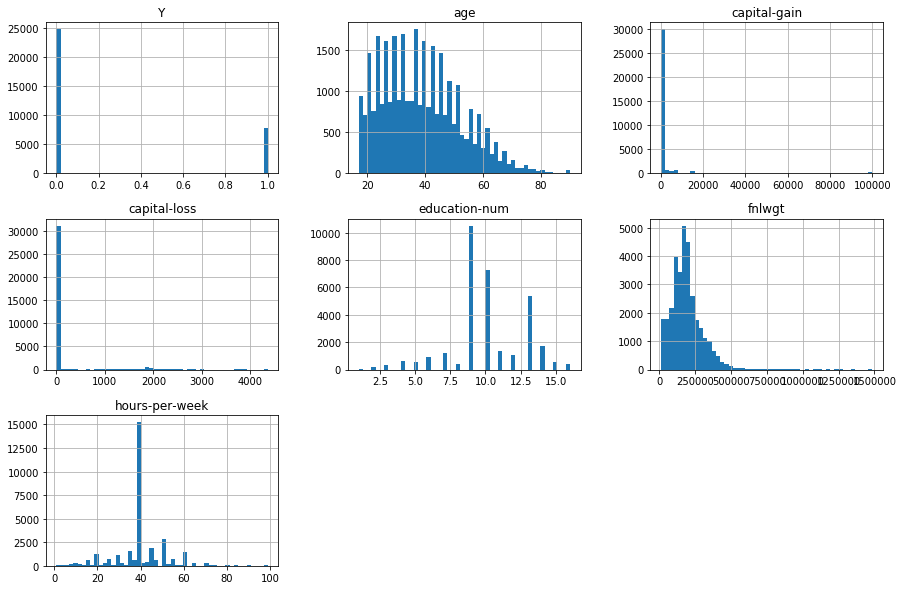

In [10]:
df.hist(bins=50, figsize=(15, 10));

## Transformando valores categóricos em features binárias

In [11]:
df = pd.get_dummies(df, drop_first=True)

## Separando em treino e teste - implementação do scikit

In [12]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.3, random_state=42, shuffle=True, stratify=df['Y'])
train = train.copy()
test = test.copy()

In [13]:
train.shape, test.shape

((22792, 83), (9769, 83))

## Preparando para a criação dos modelos

In [14]:
x_train = train.drop(labels='Y', axis=1).astype('float')
y_train = train['Y']

x_test = test.drop(labels='Y', axis=1).astype('float')
y_test = test['Y']

In [17]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((22792, 82), (9769, 82), (22792,), (9769,))

## Normalização e Standardização - implementação própria

In [18]:
nrm = Normalize()
stz = Standardize()

In [19]:
#Normalizando
x_train_norm = nrm.fit(x_train)
x_train_norm = nrm.transform(x_train)

x_test_norm = nrm.transform(x_test)

In [20]:
#Estandardizando
x_train_stand = stz.fit(x_train)
x_train_stand = stz.transform(x_train)

x_test_stand = stz.transform(x_test)

## Mostrando que a distribuição dos dados se mantém

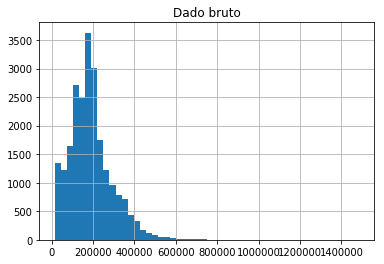

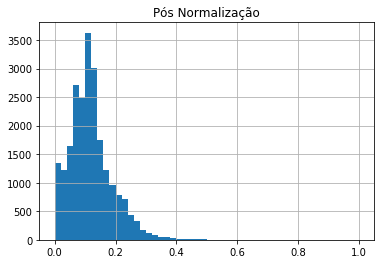

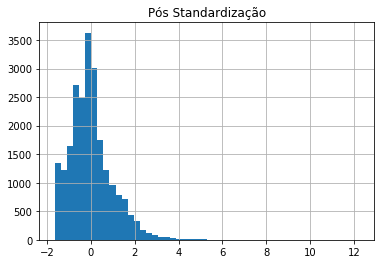

In [21]:
train['fnlwgt'].hist(bins=50)
plt.title('Dado bruto')
plt.show()

df2 = pd.DataFrame(x_train_norm)
df2['fnlwgt'].hist(bins=50)
plt.title('Pós Normalização')
plt.show()

df3 = pd.DataFrame(x_train_stand)
df3['fnlwgt'].hist(bins=50)
plt.title('Pós Standardização')
plt.show()

## Criando modelos

In [22]:
np.random.seed(42)

models = []   

models.append(('SGD', SGDClassifier(max_iter=1000, tol=1e-3)))
models.append(('LR', LogisticRegression(solver='lbfgs', max_iter=1000)))
models.append(('DT',DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier(n_estimators=100)))

## Treinando modelos e calculando acurácia - implementção própria

In [23]:
results = []
model_names = []
set_names = []
sets = {"Padrão" : (x_train, x_test), "Standardizado" : (x_train_stand, x_test_stand), "Normalizado": (x_train_norm, x_test_norm)}
for name, model in models:
    for set_name, (x1, x2) in sets.items():
        model.fit(x1, y_train)
        y_pred = model.predict(x2)
        acc_score = metrics.accuracy(y_test, y_pred)

        results.append(acc_score)
        model_names.append(name)
        set_names.append(set_name)

## Resultado

In [24]:
result_df = pd.DataFrame({ 'Modelo': model_names, 'Conjunto':set_names, 'Accuracy': results})
result_df = result_df.sort_values(by='Accuracy', ascending=False)
result_df

,Modelo,Conjunto,Accuracy
11,RF,Normalizado,0.858225
10,RF,Standardizado,0.857918
9,RF,Padrão,0.857304
5,LR,Normalizado,0.855461
4,LR,Standardizado,0.854438
2,SGD,Normalizado,0.849217
1,SGD,Standardizado,0.842154
7,DT,Standardizado,0.813901
6,DT,Padrão,0.811444
8,DT,Normalizado,0.811240
